In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from scipy.signal import argrelextrema
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import math
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
#Import Load Data
#Density 10%
D101 = pd.read_csv(r"C:\Users\Ethan\Desktop\DSA Masters\Fall 2023\Intro to Python for DSA\Project\Data\D10-1.csv", skiprows=8, header=None)
D102 = pd.read_csv(r"C:\Users\Ethan\Desktop\DSA Masters\Fall 2023\Intro to Python for DSA\Project\Data\D10-2.csv", skiprows=8, header=None)
D103 = pd.read_csv(r"C:\Users\Ethan\Desktop\DSA Masters\Fall 2023\Intro to Python for DSA\Project\Data\D10-3.csv", skiprows=8, header=None)
#Density 20%
D201 = pd.read_csv(r"C:\Users\Ethan\Desktop\DSA Masters\Fall 2023\Intro to Python for DSA\Project\Data\D20-1.csv", skiprows=8, header=None)
D202 = pd.read_csv(r"C:\Users\Ethan\Desktop\DSA Masters\Fall 2023\Intro to Python for DSA\Project\Data\D20-2.csv", skiprows=8, header=None)
D203 = pd.read_csv(r"C:\Users\Ethan\Desktop\DSA Masters\Fall 2023\Intro to Python for DSA\Project\Data\D20-3.csv", skiprows=8, header=None)
#Density 40%
D401 = pd.read_csv(r"C:\Users\Ethan\Desktop\DSA Masters\Fall 2023\Intro to Python for DSA\Project\Data\D40-1.csv", skiprows=8, header=None)
D402 = pd.read_csv(r"C:\Users\Ethan\Desktop\DSA Masters\Fall 2023\Intro to Python for DSA\Project\Data\D40-2.csv", skiprows=8, header=None)
D403 = pd.read_csv(r"C:\Users\Ethan\Desktop\DSA Masters\Fall 2023\Intro to Python for DSA\Project\Data\D40-3.csv", skiprows=8, header=None)

In [3]:
X = pd.concat([D101, D102, D103, D201, D202, D203, D401, D402, D403])
y = []
density10 = len(D101) + len(D102) + len(D103)
density20 = len(D201) + len(D202) + len(D203)
density40 = len(D401) + len(D402) + len(D403)
for i in range(len(X)):
    if i <= density10:
        y.append(10)
    elif i <= density10 + density20:
        y.append(20)
    else:
        y.append(40)
y = np.array(y)

In [4]:
def mse_rmse(trues, preds):
    mse = np.sum(np.square(trues - preds), axis=0) / trues.shape[0]
    rmse_rads = np.sqrt(mse)
    rmse_degs = rmse_rads * 180 / np.pi
    return mse, rmse_rads, rmse_degs

def predict_score_eval(model, X, y):
    preds = model.predict(X)
    
    # Fraction of Variance Accounted For
    fvaf = metrics.explained_variance_score(y, preds, multioutput='raw_values')
    mse, rmse_rads, rmse_deg = mse_rmse(y, preds) 
    return mse, rmse_rads, rmse_deg, fvaf, preds

Linear Regression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model1 = LinearRegression()
model1.fit(X_train, y_train)
preds1 = model1.predict(X_test)

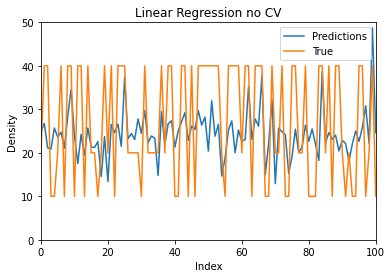

In [7]:
index = np.arange(0, len(y_test))
plt.plot(index, preds1)
plt.plot(index, y_test)
plt.xlim(0, 100)
plt.ylim(0, 50)
plt.legend(['Predictions', 'True'])
plt.title('Linear Regression no CV')
plt.xlabel('Index')
plt.ylabel('Density')
plt.show()

Training

In [8]:
modellr = LinearRegression()
modellr.fit(X_train, y_train)

LinearRegression()

Testing

In [9]:
mselrtest, rmse_radslrtest, rmse_deglrtest, fvaflrtest, predslrtest = predict_score_eval(modellr, X_test, y_test)
print('mse:', mselrtest,'\nrmse_rads:', rmse_radslrtest, '\nrmse_deg:', rmse_deglrtest, '\nfvaf:', fvaflrtest)

mse: 133.949889933802 
rmse_rads: 11.573672275202975 
rmse_deg: 663.1225748367036 
fvaf: [0.14525021]


In [10]:
lR = LinearRegression()
mae1 = cross_val_score(lR, X, y, cv=10)
r21 = cross_val_score(lR, X, y, cv=10, scoring='r2')
nmse1 = cross_val_score(lR, X, y, cv=10, scoring='neg_mean_squared_error')
#Mean absolute error
mae1 = np.mean(abs(mae1))
#R2 Score
r21 = np.mean(r21)
#Negative Mean Squared Error
nmse1 = np.mean(nmse1)
print(mae1, r21, nmse1)

0.43650970377743814 -0.3899611038628482 -181.12946879929905


Lasso

In [11]:
model2 = Lasso()
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)

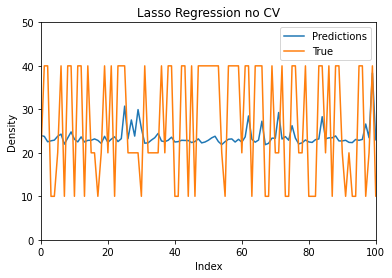

In [12]:
index = np.arange(0, len(y_test))
plt.plot(index, preds2)
plt.plot(index, y_test)
plt.xlim(0, 100)
plt.ylim(0, 50)
plt.legend(['Predictions', 'True'])
plt.title('Lasso Regression no CV')
plt.xlabel('Index')
plt.ylabel('Density')
plt.show()

In [13]:
modellasso = Lasso()
modellasso.fit(X, y)

Lasso()

In [14]:
mselassotrain, rmse_radslassotrain, rmse_deglassotrain, fvaflassotrain, predslassotrain = predict_score_eval(modellasso, X_train, y_train)
print('mse:', mselassotrain,'\nrmse_rads:', rmse_radslassotrain, '\nrmse_deg:', rmse_deglassotrain, '\nfvaf:', fvaflassotrain)

mse: 151.68511067963686 
rmse_rads: 12.316050936872454 
rmse_deg: 705.657738950935 
fvaf: [0.03231303]


In [15]:
mselassotest, rmse_radslassotest, rmse_deglassotest, fvaflassotest, predslassotest = predict_score_eval(modellasso, X_test, y_test)
print('mse:', mselassotest,'\nrmse_rads:', rmse_radslassotest, '\nrmse_deg:', rmse_deglassotest, '\nfvaf:', fvaflassotest)

mse: 151.63578037218517 
rmse_rads: 12.31404809037975 
rmse_deg: 705.5429842998906 
fvaf: [0.03239464]


In [16]:
clf = Lasso()
mae2 = cross_val_score(clf, X, y, cv=10)
r22 = cross_val_score(clf, X, y, cv=10, scoring='r2')
nmse2 = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_squared_error')
#Mean absolute error
mae2 = np.mean(abs(mae2))
#R2 Score
r22 = np.mean(r22)
#Negative Mean Squared Error
nmse2 = np.mean(nmse2)
print(mae2, r22, nmse2)

0.3331973167198271 -0.3331973167198271 -188.32286195676082


Classification

In [17]:
from sklearn.metrics import classification_report


 Naive Bayes


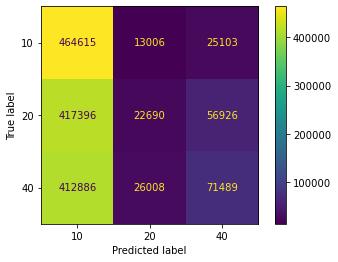

              precision    recall  f1-score   support

          10     0.3588    0.9242    0.5169    502724
          20     0.3677    0.0457    0.0812    497012
          40     0.4657    0.1401    0.2154    510383

    accuracy                         0.3700   1510119
   macro avg     0.3974    0.3700    0.2712   1510119
weighted avg     0.3979    0.3700    0.2716   1510119
 
Accuracy: 0.3700330901074684

 Decision Tree


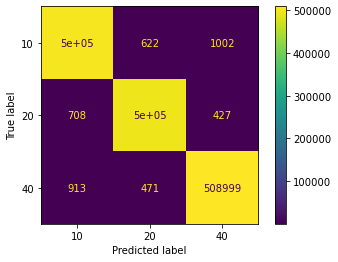

              precision    recall  f1-score   support

          10     0.9968    0.9968    0.9968    502724
          20     0.9978    0.9977    0.9978    497012
          40     0.9972    0.9973    0.9972    510383

    accuracy                         0.9973   1510119
   macro avg     0.9973    0.9973    0.9973   1510119
weighted avg     0.9973    0.9973    0.9973   1510119
 
Accuracy: 0.9972565075997322


In [19]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

models = [GaussianNB(), DecisionTreeClassifier()]
names = ["Naive Bayes", "Decision Tree"]
for model, name in zip(models, names):
    print('\n', name)
    model.fit(X_train, y_train)
    predsClass = cross_val_predict(model, X_test, y_test, cv=10)
    #Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, predsClass)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [10, 20, 40])
    cm_display.plot()
    plt.show()
    #Results
    print(classification_report(y_test, predsClass, digits=4), '\nAccuracy:', accuracy_score(y_test, predsClass))

In [21]:
from sklearn import neighbors, datasets

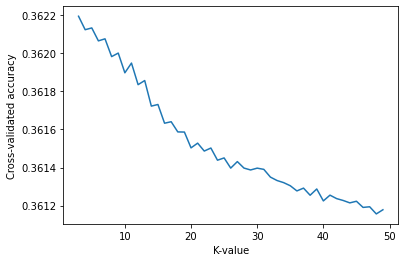

TypeError: n_neighbors does not take <class 'numpy.float64'> value, enter integer value

In [27]:
k_range = range(3,50)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=2, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('K-value')
plt.ylabel('Cross-validated accuracy')
plt.show()  

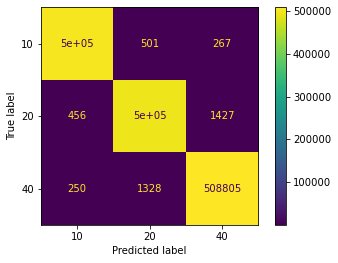

              precision    recall  f1-score   support

          10     0.9986    0.9985    0.9985    502724
          20     0.9963    0.9962    0.9963    497012
          40     0.9967    0.9969    0.9968    510383

    accuracy                         0.9972   1510119
   macro avg     0.9972    0.9972    0.9972   1510119
weighted avg     0.9972    0.9972    0.9972   1510119



In [28]:
knn = neighbors.KNeighborsClassifier(3)
knn.fit(X_train, y_train)
preds = cross_val_predict(knn, X_test, y_test, cv=10)

#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [10, 20, 40])
cm_display.plot()
plt.show()

#Results
print(classification_report(y_test, preds, digits=4))